In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('features_3_sec.csv')
data = data.iloc[0:, 1:]
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

<Axes: xlabel='label', ylabel='count'>

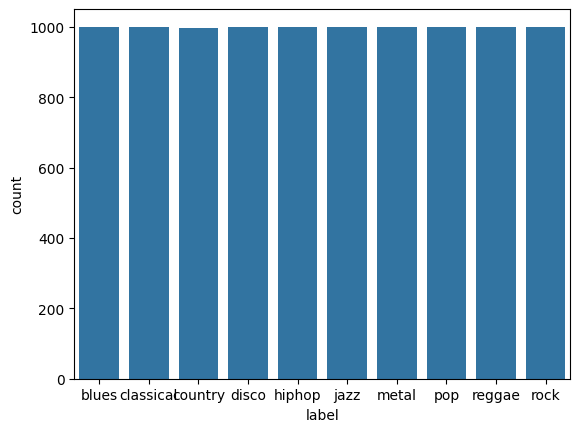

In [3]:
sns.countplot(x='label',data=data)

In [4]:
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [5]:

X = data.loc[:, data.columns != 'label']
y = data['label']

In [6]:
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [7]:
X.shape

(9990, 58)

In [8]:
y.shape

(9990,)

In [9]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)

y


array([0, 0, 0, ..., 9, 9, 9])

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

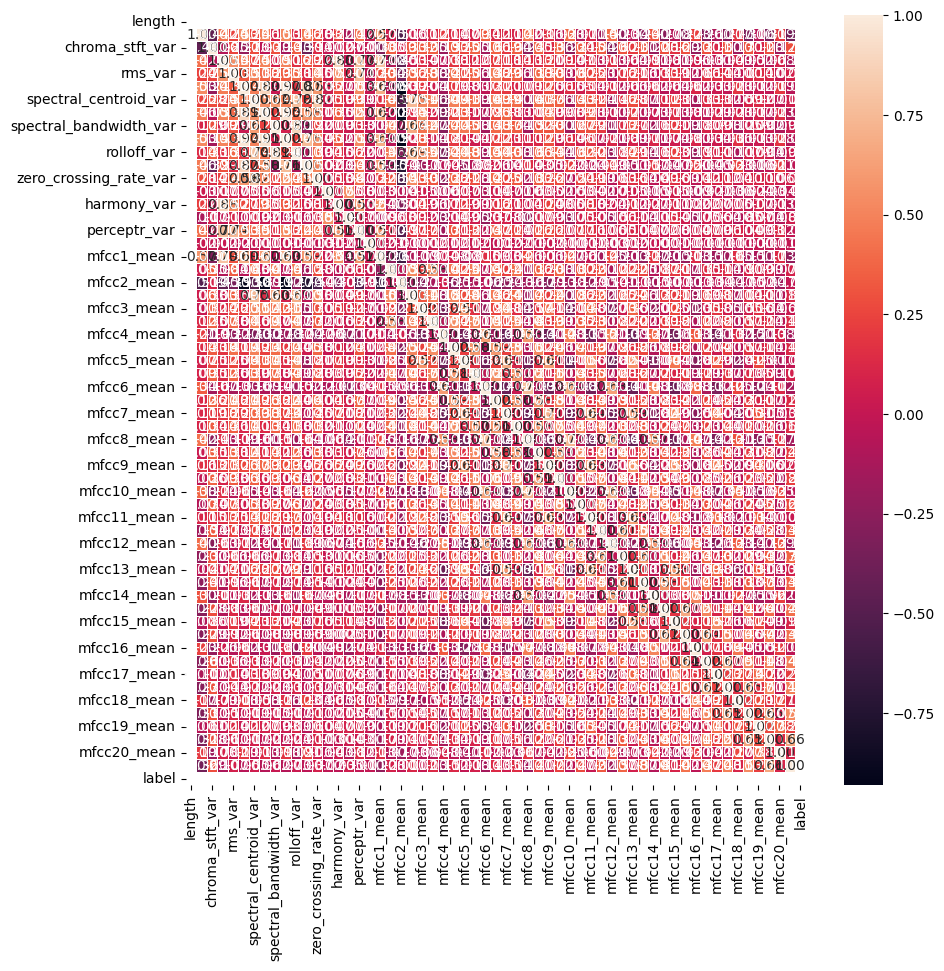

In [11]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(10,10))
data=data.apply(pd.to_numeric,errors='coerce')
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt='.2f')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [15]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
preds = xgb.predict(X_test)
XgAcc = accuracy_score(y_test, preds)

In [17]:
print('Accuracy', ':', XgAcc*100)

Accuracy : 90.29029029029029


In [18]:
from sklearn.metrics import classification_report
rep1=classification_report(y_test,preds)
print(rep1)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       319
           1       0.93      0.98      0.96       308
           2       0.81      0.86      0.84       286
           3       0.87      0.89      0.88       301
           4       0.93      0.90      0.91       311
           5       0.89      0.92      0.91       286
           6       0.94      0.94      0.94       303
           7       0.90      0.95      0.93       267
           8       0.92      0.89      0.91       316
           9       0.91      0.82      0.87       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



In [19]:
random = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [20]:
r_pred = random.predict(X_test)
randomAcc = accuracy_score(y_test, r_pred)

In [21]:
print('Accuracy', ':', randomAcc*100)

Accuracy : 81.34801468134802


In [22]:
rep2=classification_report(y_test,r_pred)
print(rep2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       319
           1       0.91      0.95      0.93       308
           2       0.67      0.74      0.70       286
           3       0.74      0.77      0.76       301
           4       0.89      0.80      0.84       311
           5       0.79      0.88      0.83       286
           6       0.83      0.93      0.87       303
           7       0.83      0.89      0.86       267
           8       0.81      0.81      0.81       316
           9       0.80      0.60      0.68       300

    accuracy                           0.81      2997
   macro avg       0.81      0.81      0.81      2997
weighted avg       0.82      0.81      0.81      2997



In [23]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(splitter='random')
decision.fit(X_train,y_train)


DecisionTreeClassifier(splitter='random')

In [24]:
dec_pred=decision.predict(X_test)

In [25]:
dec_acc=accuracy_score(dec_pred,y_test)
print(dec_acc*100)

63.36336336336337


In [26]:
rep3=classification_report(y_test,dec_pred)
print(rep3)

              precision    recall  f1-score   support

           0       0.60      0.55      0.57       319
           1       0.86      0.79      0.82       308
           2       0.51      0.53      0.52       286
           3       0.55      0.50      0.53       301
           4       0.64      0.63      0.63       311
           5       0.66      0.67      0.67       286
           6       0.69      0.74      0.71       303
           7       0.72      0.78      0.75       267
           8       0.60      0.63      0.62       316
           9       0.51      0.51      0.51       300

    accuracy                           0.63      2997
   macro avg       0.63      0.64      0.63      2997
weighted avg       0.63      0.63      0.63      2997



<function matplotlib.pyplot.show(close=None, block=None)>

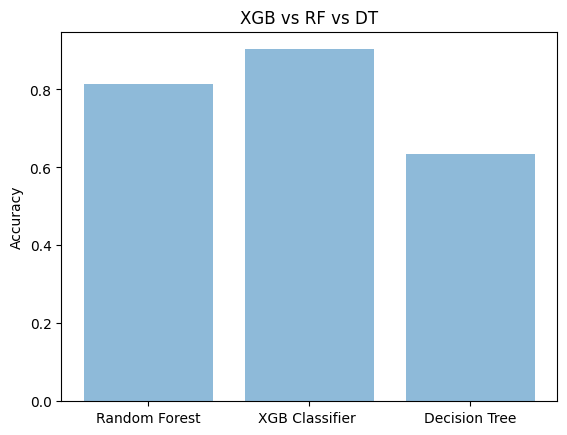

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults() #colors indication take by default

objects =('Random Forest',"XGB Classifier ","Decision Tree")
y_pos=np.arange(len(objects)) #y-position
performance=[randomAcc,XgAcc,dec_acc] #plotting accuracy 1 and accuracy 2

plt.bar(y_pos,performance,align="center",alpha=0.5)
plt.xticks(y_pos,objects) #x-position
plt.ylabel('Accuracy')
plt.title('XGB vs RF vs DT') #title of the graph

plt.show #display the plot